# Import libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train_path = "/content/drive/MyDrive/titanic-project/data/row/train (2).csv"
test_path = "/content/drive/MyDrive/titanic-project/data/row/test (1).csv"

In [6]:
df = pd.read_csv(train_path)

In [7]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.shape

(891, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [12]:
df['Survived'].value_counts(normalize=True)

,proportion
Survived,
0,0.616162
1,0.383838


# Data Cleaning

In [13]:
df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].transform(
    lambda x: x.fillna(x.median())
)

In [14]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [15]:
df['Has_Cabin'] = df['Cabin'].notnull().astype(int)

In [16]:
df.drop(columns=['Cabin'],inplace=True)

In [17]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# Feature Engineering

In [18]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Has_Cabin'],
      dtype='object')

In [19]:
df['Family_size'] = df['SibSp']+df['Parch']+1

In [20]:
df['IsAlone'] = (df['Family_size']==1).astype(int)

In [21]:
df['title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-1549504143.py:1: SyntaxWarning: invalid escape sequence '\.'
  df['title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [22]:
df['title'].value_counts()

,count
title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


In [23]:
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don',
               'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
df['title'] = df['title'].replace(rare_titles,'Rare')
df['title'] = df['title'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})

In [24]:
df['AgeGroup']= pd.cut(
    df['Age'],
    bins=[0,12,18,60,100],
    labels=['Child','Teen','Adult','Senior']
)

In [25]:
df['FarePerPerson'] = df['Fare']/df['Family_size']

In [26]:
df.drop(columns=['Name','Ticket'],inplace=True)

In [27]:
df.to_csv('/content/drive/MyDrive/titanic-project/data/processed/titanic_processed.csv')

# Exploratory Data Analysis (EDA)

In [28]:
df.groupby('Sex')['Survived'].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [29]:
df.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [30]:
df.groupby('Pclass')['Survived'].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


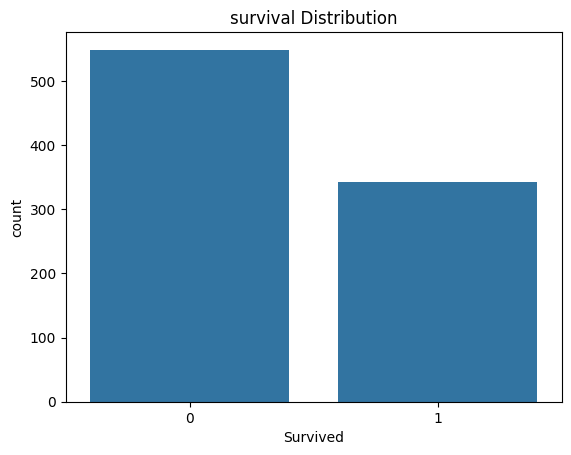

In [31]:
sns.countplot(x='Survived',data=df)
plt.title('survival Distribution')
plt.show()

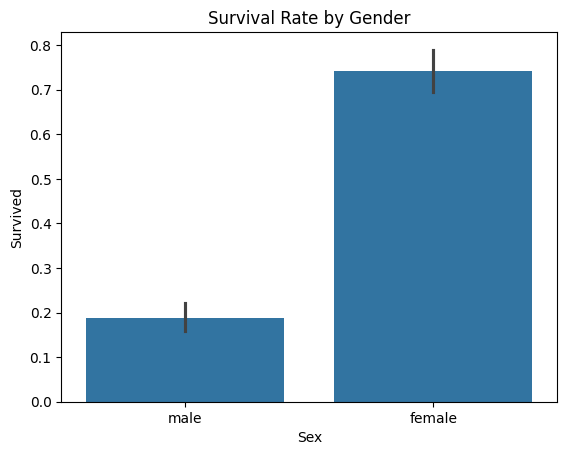

In [32]:
sns.barplot(x='Sex',y='Survived',data = df)
plt.title('Survival Rate by Gender')
plt.show()

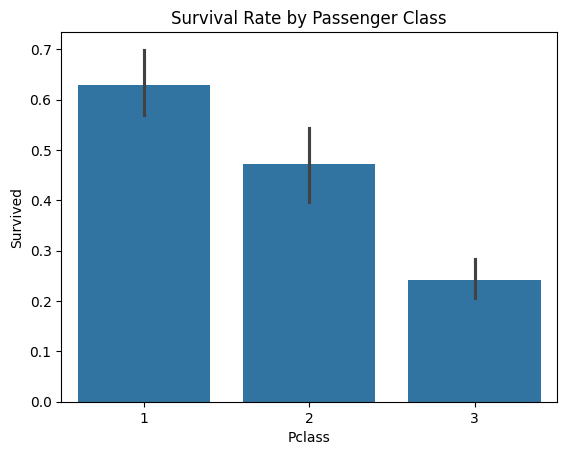

In [33]:
sns.barplot(x='Pclass',y='Survived',data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

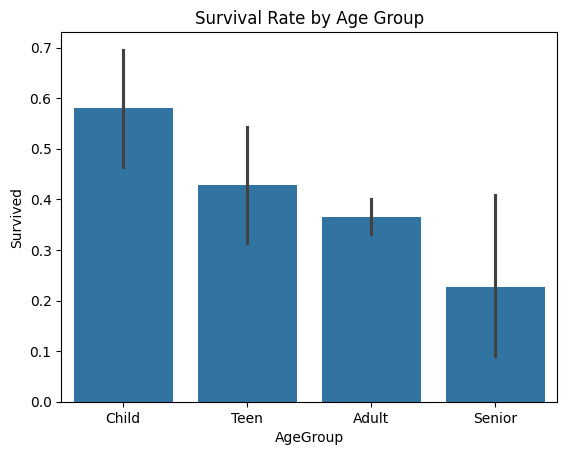

In [34]:
sns.barplot(x='AgeGroup',y='Survived',data=df)
plt.title("Survival Rate by Age Group")
plt.show()

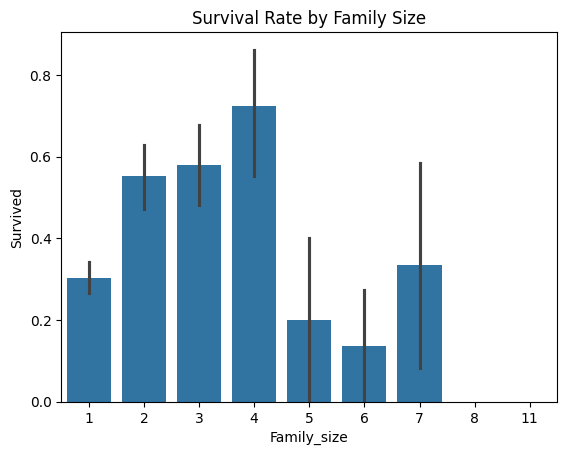

In [35]:
sns.barplot(x='Family_size',y='Survived',data=df)
plt.title("Survival Rate by Family Size")
plt.show()

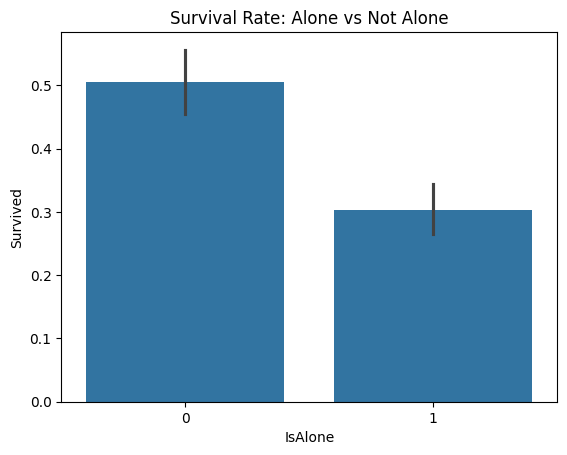

In [36]:
sns.barplot(x='IsAlone', y='Survived', data=df)
plt.title("Survival Rate: Alone vs Not Alone")
plt.show()

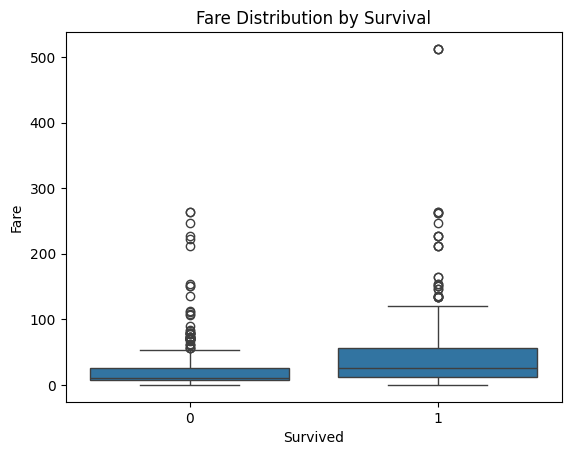

In [37]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare Distribution by Survival")
plt.show()

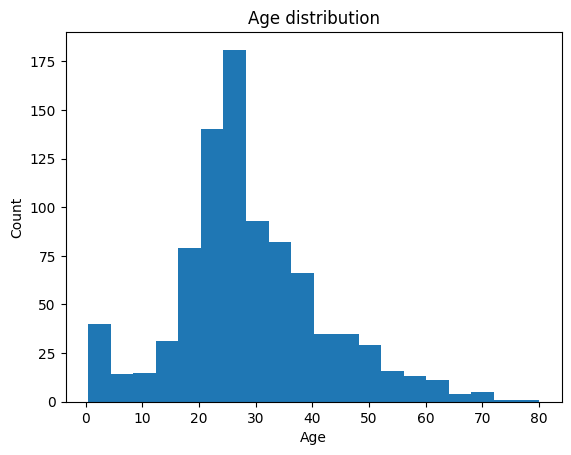

In [38]:
plt.hist(df['Age'],bins=20)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

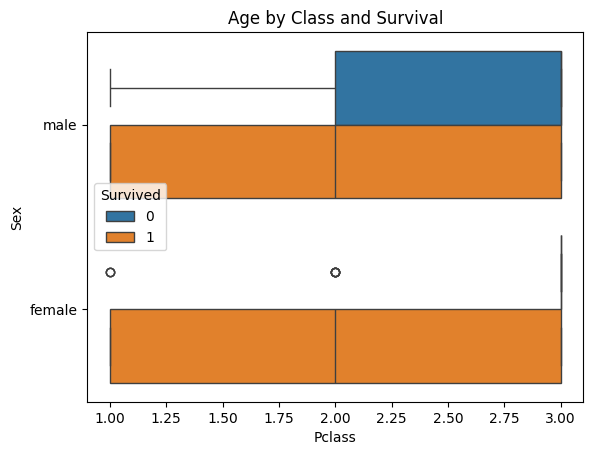

In [39]:
sns.boxplot(x='Pclass',y='Sex',hue='Survived',data=df)
plt.title('Age by Class and Survival')
plt.show()

In [40]:
import plotly.express as px
fig=px.bar(df,x='Sex',y='Survived',color='Pclass',barmode='group')
fig.show()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    891 non-null    int64   
 1   Survived       891 non-null    int64   
 2   Pclass         891 non-null    int64   
 3   Sex            891 non-null    object  
 4   Age            891 non-null    float64 
 5   SibSp          891 non-null    int64   
 6   Parch          891 non-null    int64   
 7   Fare           891 non-null    float64 
 8   Embarked       891 non-null    object  
 9   Has_Cabin      891 non-null    int64   
 10  Family_size    891 non-null    int64   
 11  IsAlone        891 non-null    int64   
 12  title          891 non-null    object  
 13  AgeGroup       891 non-null    category
 14  FarePerPerson  891 non-null    float64 
dtypes: category(1), float64(3), int64(8), object(3)
memory usage: 98.7+ KB


In [42]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [43]:
df['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [44]:
#Convert categorical to numbers
df['Sex'] = df['Sex'].map({'male':0,'female':1})
df['Embarked']= df['Embarked'].map({'S':0,'C':1,'Q':2})

In [45]:
df['Sex'].value_counts()

,count
Sex,
0,577
1,314


In [46]:
df['Embarked'].value_counts()

,count
Embarked,
0,646
1,168
2,77


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    891 non-null    int64   
 1   Survived       891 non-null    int64   
 2   Pclass         891 non-null    int64   
 3   Sex            891 non-null    int64   
 4   Age            891 non-null    float64 
 5   SibSp          891 non-null    int64   
 6   Parch          891 non-null    int64   
 7   Fare           891 non-null    float64 
 8   Embarked       891 non-null    int64   
 9   Has_Cabin      891 non-null    int64   
 10  Family_size    891 non-null    int64   
 11  IsAlone        891 non-null    int64   
 12  title          891 non-null    object  
 13  AgeGroup       891 non-null    category
 14  FarePerPerson  891 non-null    float64 
dtypes: category(1), float64(3), int64(10), object(1)
memory usage: 98.7+ KB


In [48]:
df.drop(['PassengerId'],axis=1,inplace=True)

In [49]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Family_size,IsAlone,title,AgeGroup,FarePerPerson
0,0,3,0,22.0,1,0,7.2500,0,0,2,0,Mr,Adult,3.62500
1,1,1,1,38.0,1,0,71.2833,1,1,2,0,Mrs,Adult,35.64165
2,1,3,1,26.0,0,0,7.9250,0,0,1,1,Miss,Adult,7.92500
3,1,1,1,35.0,1,0,53.1000,0,1,2,0,Mrs,Adult,26.55000
4,0,3,0,35.0,0,0,8.0500,0,0,1,1,Mr,Adult,8.05000


In [50]:
df = df.drop([ 'SibSp', 'Parch'], axis=1)

In [51]:
df['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [52]:
title_Maping={
    'Mr' :0,
    'Mrs' :1,
    'Miss' :2,
    'Master' :3,
    'Rare':4
}

In [53]:
df['title']=df['title'].map(title_Maping)

In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['AgeGroup'] = le.fit_transform(df['AgeGroup'])

In [55]:
df['AgeGroup'].value_counts()

,count
AgeGroup,
0,730
3,70
1,69
2,22


# Split Data into Train & Test

In [56]:
from sklearn.model_selection import train_test_split
x=df.drop('Survived',axis=1)

In [57]:
y=df['Survived']

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

# Train Several Models

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

In [60]:
# 1. Logistic Regression
lr= LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
print("Logistic Regression Accuracy : ", accuracy_score(y_test,y_pred_lr))

Logistic Regression Accuracy :  0.8044692737430168


In [61]:
# 2. Random Forest
Rf = RandomForestClassifier(n_estimators=100,random_state=42)
Rf.fit(x_train,y_train)
y_pred_Rf=Rf.predict(x_test)
print("Random Forest Accuracy : ", accuracy_score(y_test,y_pred_Rf))

Random Forest Accuracy :  0.8379888268156425


In [62]:
# 3. Support Vector Machine
SVM = SVC(kernel='rbf')
SVM.fit(x_train,y_train)
y_pred_Svm = SVM.predict(x_test)
print("SVM Accuracy : ", accuracy_score(y_test,y_pred_Svm))

SVM Accuracy :  0.6703910614525139


# Evaluate the Best Model

In [63]:
print(classification_report(y_test,y_pred_Rf))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       105
           1       0.78      0.84      0.81        74

    accuracy                           0.84       179
   macro avg       0.83      0.84      0.83       179
weighted avg       0.84      0.84      0.84       179



In [64]:
# Feature importance
importances = pd.DataFrame({
    'Feature' : x.columns,
    'Importance' : Rf.feature_importances_
}).sort_values('Importance',ascending=False)

In [65]:
print(importances)

          Feature  Importance
2             Age    0.180437
8           title    0.161950
10  FarePerPerson    0.155532
3            Fare    0.154990
1             Sex    0.142850
6     Family_size    0.057956
0          Pclass    0.057509
5       Has_Cabin    0.032010
4        Embarked    0.027894
9        AgeGroup    0.018699
7         IsAlone    0.010173


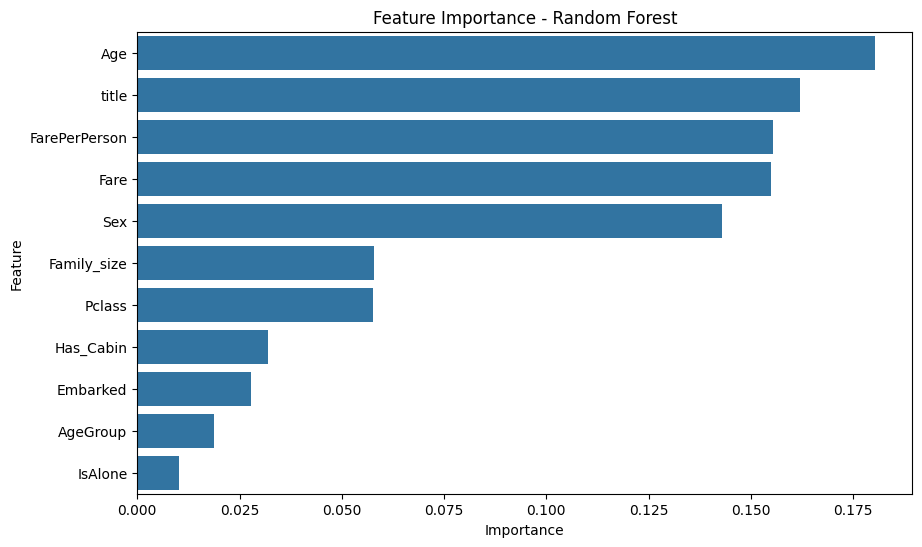

In [66]:
# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Feature',data=importances)
plt.title('Feature Importance - Random Forest')
plt.show()

# Save & Export the Model

In [67]:
import joblib

In [68]:
joblib.dump(Rf,'/content/drive/MyDrive/titanic-project/Models/titanic_random_forest_model.pkl')

['/content/drive/MyDrive/titanic-project/Models/titanic_random_forest_model.pkl']

# Create a Simple Web App

In [69]:
!pip install streamlit -q
!npm install localtunnel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 107.6 MB/s eta 0:00:00
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹
added 22 packages in 3s
⠹
⠹3 packages are looking for funding
⠸  run `npm fund` for details
⠸

In [70]:
%%writefile app.py
import streamlit as st
import joblib
import pandas as pd

# Try to load model — if file not found, show message
try:
    model = joblib.load('titanic_random_forest_model.pkl')
    st.success("Model loaded successfully!")
except:
    st.error("Model file not found. Please upload 'titanic_random_forest_model.pkl'")

st.title("Titanic Survival Predictor")

st.write("Fill in the passenger information below:")

col1, col2 = st.columns(2)

with col1:
    pclass = st.selectbox("Passenger Class", [1, 2, 3], index=1)
    sex = st.selectbox("Gender", ["Male", "Female"])
    age = st.slider("Age", 0, 100, 28)

with col2:
    fare = st.number_input("Fare", min_value=0.0, max_value=1000.0, value=30.0, step=1.0)
    embarked = st.selectbox("Embarked", ["S", "C", "Q"])
    family_size = st.slider("Family Size (including self)", 1, 11, 1)

if st.button("Make Prediction"):
    st.info("Prediction would run here if model is loaded")
    # Add your prediction code later once model loads

Writing app.py


In [71]:
!curl ipv4.icanhazip.com

35.225.164.152


In [ ]:
!streamlit run /content/drive/MyDrive/titanic-project/App/app.py &>/content/logs.txt &
!npx localtunnel --port 8501

⠙⠹your url is: https://fuzzy-ideas-brush.loca.lt
^C
